# Amazon Consumer Electronics Review Analysis: Uncovering Insights from 1,500+ Reviews

## Importing dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1219 non-null   object 
 15  reviews.doRecommend  

In [4]:
data.shape

(1597, 27)

## Data Preprocessing

In [5]:
data['reviews.rating'] = pd.to_numeric(data['reviews.rating'])

In [6]:
data['dateAdded'] = pd.to_datetime(data['dateAdded'])
data['dateUpdated'] = pd.to_datetime(data['dateUpdated'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    1597 non-null   object             
 1   asins                 1597 non-null   object             
 2   brand                 1597 non-null   object             
 3   categories            1597 non-null   object             
 4   colors                774 non-null    object             
 5   dateAdded             1597 non-null   datetime64[ns, UTC]
 6   dateUpdated           1597 non-null   datetime64[ns, UTC]
 7   dimension             565 non-null    object             
 8   ean                   898 non-null    float64            
 9   keys                  1597 non-null   object             
 10  manufacturer          965 non-null    object             
 11  manufacturerNumber    902 non-null    object             
 12  name  

In [8]:
data.nunique()

id                        66
asins                     54
brand                      2
categories                19
colors                     3
dateAdded                 50
dateUpdated               42
dimension                  2
ean                        2
keys                      66
manufacturer               2
manufacturerNumber         6
name                      62
prices                    66
reviews.date             382
reviews.doRecommend        2
reviews.numHelpful       182
reviews.rating             5
reviews.sourceURLs       499
reviews.text            1048
reviews.title           1270
reviews.userCity           0
reviews.userProvince       0
reviews.username         949
sizes                      0
upc                        2
weight                     9
dtype: int64

In [9]:
data.isnull().sum()

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             378
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64

In [10]:
data.isnull()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,True,True,False
1,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,True,True,False
2,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,True,True,False
3,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,True,True,False
4,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,False,False,False,False,True,False,False,True,True,False,...,False,False,False,False,True,True,False,True,True,False
1593,False,False,False,False,True,False,False,True,True,False,...,False,False,False,False,True,True,False,True,True,False
1594,False,False,False,False,True,False,False,True,True,False,...,False,False,False,False,True,True,False,True,True,False
1595,False,False,False,False,True,False,False,True,True,False,...,False,False,False,False,True,True,False,True,True,False


In [11]:
data = data.drop_duplicates()
data.shape

(1597, 27)

In [12]:
data['reviews.rating'].unique()

array([ 5.,  4., nan,  3.,  1.,  2.])

In [13]:
#Option 1. Filling null values with the mean
data = data.fillna(value = data['reviews.rating'].mean())

In [14]:
data = data.fillna('')

In [15]:
for x in data.index:
  if data.loc[x, "reviews.rating"] == '':
    data.drop(x, inplace=True)

## Descriptive Statistics

In [16]:
data.describe()

,ean,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,sizes,upc
count,1.597000e+03,1597.000000,1597.000000,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03
mean,4.749374e+11,49.007197,4.359388,4.359388e+00,4.359388e+00,4.359388e+00,4.749374e+11
std,4.191609e+11,153.096634,0.876803,1.554799e-13,1.554799e-13,1.554799e-13,4.191609e+11
min,4.359388e+00,0.000000,1.000000,4.359388e+00,4.359388e+00,4.359388e+00,4.359388e+00
25%,4.359388e+00,0.000000,4.000000,4.359388e+00,4.359388e+00,4.359388e+00,4.359388e+00
50%,8.420000e+11,4.359388,4.359388,4.359388e+00,4.359388e+00,4.359388e+00,8.420000e+11
75%,8.420000e+11,4.359388,5.000000,4.359388e+00,4.359388e+00,4.359388e+00,8.420000e+11
max,8.490000e+11,997.000000,5.000000,4.359388e+00,4.359388e+00,4.359388e+00,8.490000e+11


# Exploratory Data Analysis

In [17]:
data['reviews.rating'].unique()

array([5.        , 4.        , 4.35938828, 3.        , 1.        ,
       2.        ])

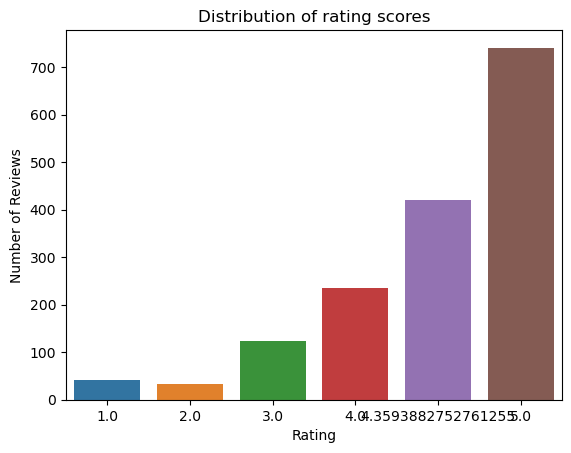

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['reviews.rating'])
plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [19]:
def score(df):
  """ This function categories the reviews into positive, negative and neutral based on the overall rating given """
  if df['reviews.rating'] == 3.0 :
    review = 'neutral'
  elif df['reviews.rating'] > 3.0 :
    review = 'positive'
  elif df['reviews.rating'] < 3.0 :
    review = 'negative'
  else :
    review = -1
  return review

In [20]:
#Applying the function in our new column
data['sentiment'] = data.apply(score, axis=1)
data.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,sentiment
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",4.359388,2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,169 mm x 117 mm x 9.1 mm,4.359388,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",4.359388,4.359388,Cristina M,4.359388,4.359388,205 grams,positive
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",4.359388,2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,169 mm x 117 mm x 9.1 mm,4.359388,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,4.359388,4.359388,Ricky,4.359388,4.359388,205 grams,positive
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",4.359388,2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,169 mm x 117 mm x 9.1 mm,4.359388,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,4.359388,4.359388,Tedd Gardiner,4.359388,4.359388,205 grams,positive
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",4.359388,2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,169 mm x 117 mm x 9.1 mm,4.359388,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,4.359388,4.359388,Dougal,4.359388,4.359388,205 grams,positive
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",4.359388,2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,169 mm x 117 mm x 9.1 mm,4.359388,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,4.359388,4.359388,Miljan David Tanic,4.359388,4.359388,205 grams,positive


In [21]:
data['sentiment'].value_counts()

sentiment
positive    1397
neutral      124
negative      76
Name: count, dtype: int64

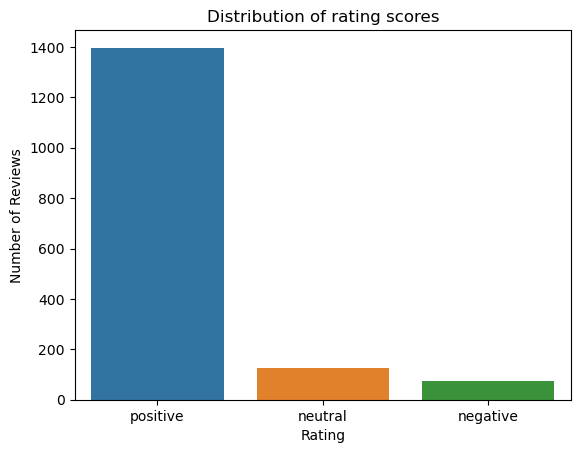

In [22]:
sns.countplot(x=data['sentiment'])
plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Top 10 Most reviewed products

In [23]:
top_reviews = data['id'].value_counts().head(10).index
print(top_reviews)

Index(['AVpfpK8KLJeJML43BCuD', 'AVpfLiCSilAPnD_xWpk_', 'AVpge-anilAPnD_xtDVf',
       'AVpjWh8e1cnluZ0-Vy0O', 'AVpe7LD5LJeJML43ybWA', 'AVpfpzCi1cnluZ0-oxEr',
       'AVpf0MlqLJeJML43EQEi', 'AVpff7_VilAPnD_xc1E_', 'AVpfBEWcilAPnD_xTGb7',
       'AVzRloqLGV-KLJ3aavBd'],
      dtype='object', name='id')


In [24]:
top_reviews = data['name'].value_counts().head(10).index
print(top_reviews)

Index(['Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker',
       'Amazon Fire TV', 'Amazon Premium Headphones', 'Fire HD 6 Tablet',
       'Kindle Fire HDX 7"', 'Kindle Fire HDX 8.9"', 'Kindle Fire HD 7"',
       'Kindle Paperwhite',
       'Certified Refurbished Amazon Fire TV (Previous Generation - 1st)',
       'Kindle Keyboard'],
      dtype='object', name='name')


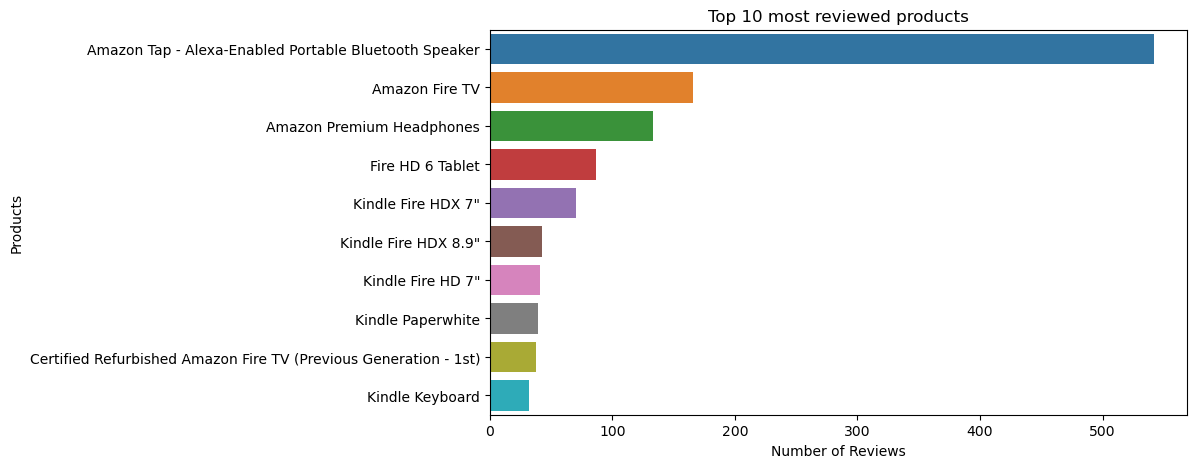

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.countplot(data=data, y='name', order=top_reviews)
plt.title('Top 10 most reviewed products')
plt.xlabel('Number of Reviews')
plt.ylabel('Products')
plt.show()

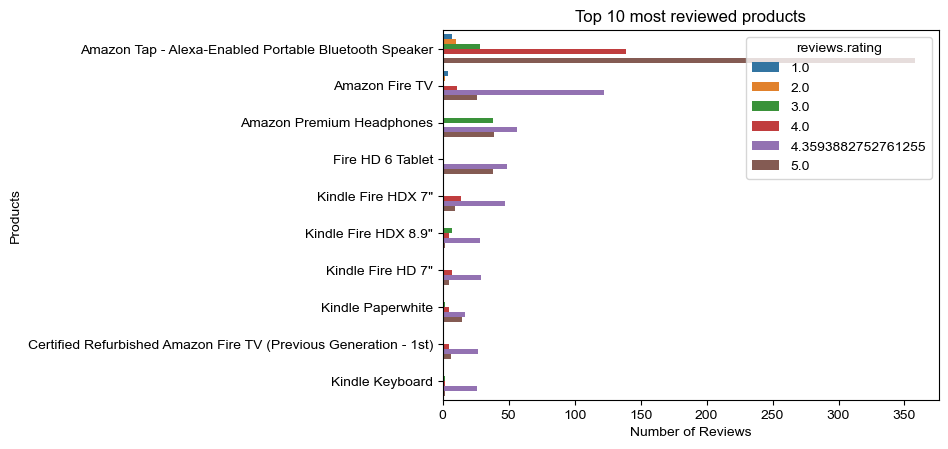

In [26]:
sns.countplot(y='name',hue='reviews.rating',data=data, order=top_reviews)
sns.set(rc={'figure.figsize':(9,5)})
plt.title("Top 10 most reviewed products")
plt.xlabel('Number of Reviews')
plt.ylabel('Products')
plt.show()

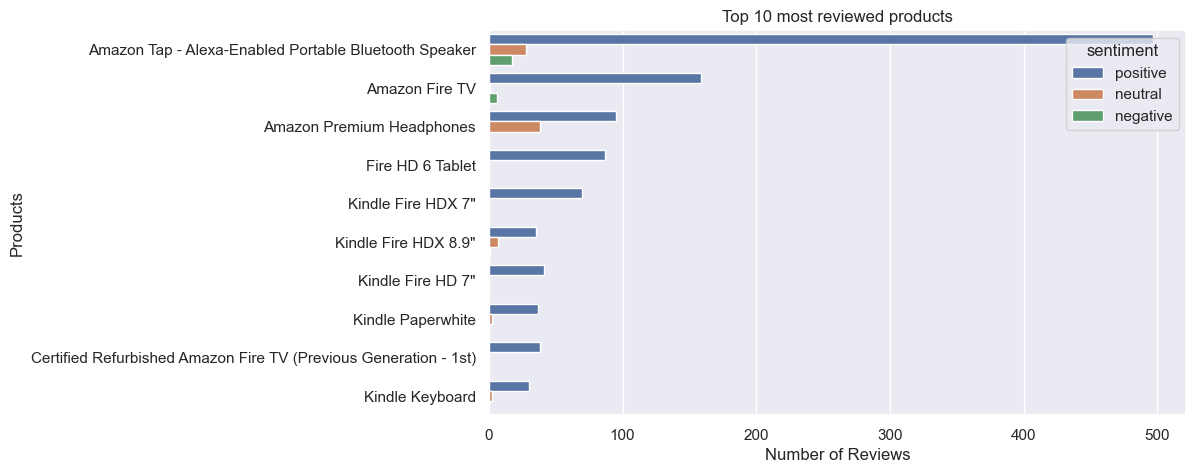

In [27]:
sns.countplot(y='name',hue='sentiment',data=data, order=top_reviews)
sns.set(rc={'figure.figsize':(9,5)})
plt.title("Top 10 most reviewed products")
plt.xlabel('Number of Reviews')
plt.ylabel('Products')
plt.show()

# Quantitative Analysis

In [28]:
intial_reviews = data['dateAdded']

In [29]:
# Let's consider first product in Top 10 Review ie. "Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker "

# Assuming 'id' is the unique identifier for each product
product_id = 'AVpfpK8KLJeJML43BCuD'  # Replace 'your_product_id_here' with the actual product ID
product_name = 'Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker'
specific_product_data = data[data['id'] == product_id]

print('Product ID :', product_id)
print('Product Name :', product_name)
print(specific_product_data['reviews.date'])

Product ID : AVpfpK8KLJeJML43BCuD
Product Name : Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker
852     2016-05-31T00:00:00.000Z
853     2016-04-05T00:00:00.000Z
854     2016-05-31T00:00:00.000Z
855     2016-05-31T00:00:00.000Z
856     2016-05-30T00:00:00.000Z
                  ...           
1389    2017-06-10T00:00:00.000Z
1390    2017-06-09T00:00:00.000Z
1391    2017-06-08T00:00:00.000Z
1392    2017-06-05T00:00:00.000Z
1393    2016-09-09T00:00:00.000Z
Name: reviews.date, Length: 542, dtype: object


In [30]:
specific_product_data['reviews.date'] = pd.to_datetime(specific_product_data['reviews.date'])
specific_product_data = specific_product_data.dropna(subset=['reviews.date'])
specific_product_data = specific_product_data.sort_values(by='reviews.date')

# Group by 'date' and count the number of reviews for each date
reviews_count_per_date = specific_product_data.groupby('reviews.date').size().reset_index(name='num_reviews')
print(reviews_count_per_date)

                 reviews.date  num_reviews
0   2016-04-05 00:00:00+00:00            1
1   2016-05-30 00:00:00+00:00            1
2   2016-05-31 00:00:00+00:00            3
3   2016-06-04 00:00:00+00:00            1
4   2016-06-05 00:00:00+00:00            1
..                        ...          ...
213 2017-07-21 00:00:00+00:00            2
214 2017-07-22 00:00:00+00:00            1
215 2017-07-28 00:00:00+00:00            3
216 2017-07-29 00:00:00+00:00            1
217 2017-07-31 00:00:00+00:00            1

[218 rows x 2 columns]


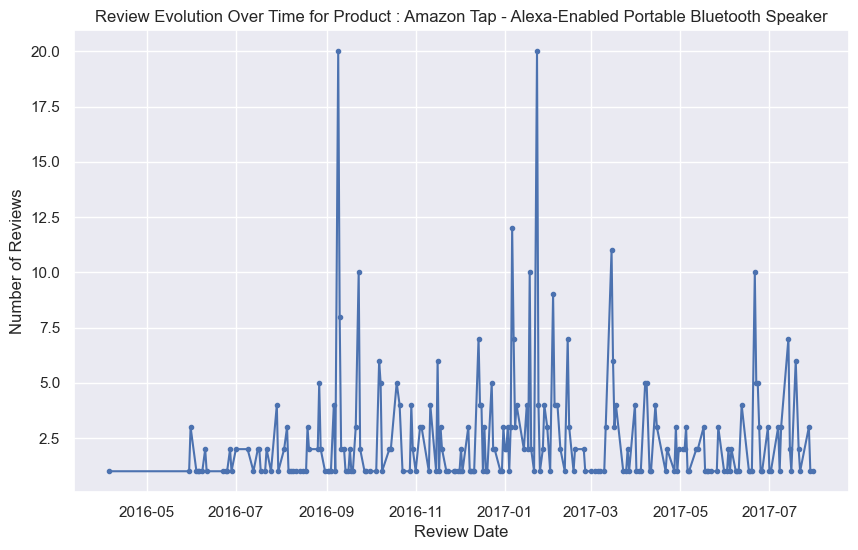

In [31]:
# Plotting review counts over time for the specific product
plt.figure(figsize=(10, 6))
plt.plot(reviews_count_per_date['reviews.date'], reviews_count_per_date['num_reviews'], marker='.')
plt.xlabel('Review Date')
plt.ylabel('Number of Reviews')
plt.title(f'Review Evolution Over Time for Product : {product_name}')
plt.grid(True)
plt.show()

# Correlation between product attributes

In [32]:
print(data['prices'][0])

[{"amountMax":139.99,"amountMin":139.99,"currency":"USD","dateAdded":"2017-07-18T23:52:58Z","dateSeen":["2017-07-15T18:10:23.807Z","2016-03-16T00:00:00Z"],"isSale":"false","merchant":"Amazon.com","shipping":"FREE Shipping.","sourceURLs":["https://www.amazon.com/Kindle-Paperwhite-High-Resolution-Display-Built/dp/B00QJDU3KY/ref=lp_6669702011_1_7/132-1677641-8459202?s=amazon-devices&ie=UTF8&qid=1498832761&sr=1-7","http://www.amazon.com/Kindle-Paperwhite-High-Resolution-Display-Built-/dp/B00QJDU3KY"]},{"amountMax":119.99,"amountMin":119.99,"condition":"new","currency":"EUR","dateAdded":"2016-03-08T20:21:53Z","dateSeen":["2016-01-29T00:00:00Z"],"isSale":"false","merchant":"Amazon EU Sarl","shipping":"free","sourceURLs":["http://www.amazon.co.uk/Kindle-Paperwhite-Resolution-Display-Built-/dp/B00QJDU3KY"]},{"amountMax":139.99,"amountMin":139.99,"condition":"new","currency":"CAD","dateAdded":"2016-03-08T20:21:53Z","dateSeen":["2016-01-11T00:00:00Z"],"isSale":"false","merchant":"Amazon","shippi

In [33]:
import pandas as pd
import json

# Convert JSON strings to Python lists
data['prices1'] = data['prices'].apply(lambda x: json.loads(x) if pd.notna(x) else [])

# Extract the relevant information from the list
data['amountMax'] = data['prices1'].apply(lambda x: x[0]['amountMax'] if x else None)
data['amountMin'] = data['prices1'].apply(lambda x: x[0]['amountMin'] if x else None)
data['currency'] = data['prices1'].apply(lambda x: x[0]['currency'] if x else None)


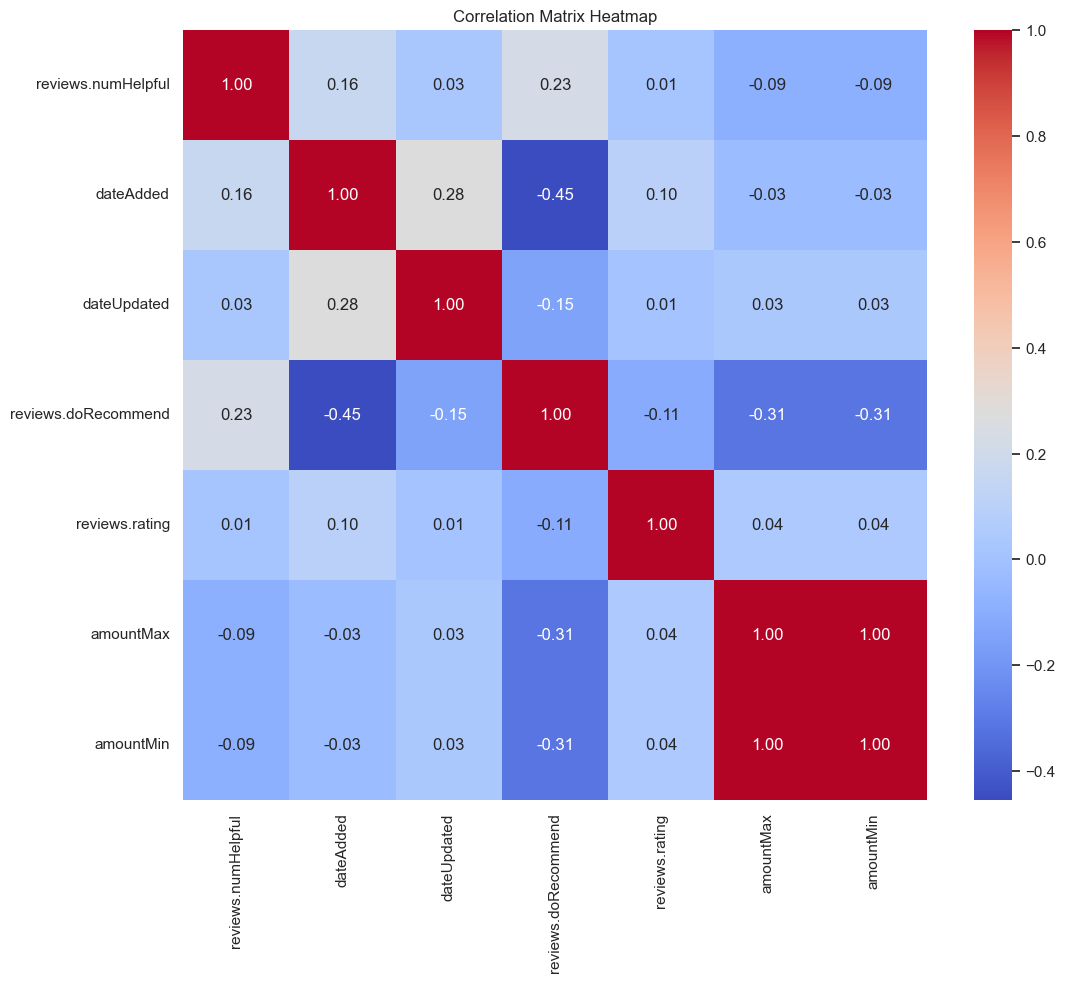

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame, replace it with your actual DataFrame
# Drop irrelevant columns or preprocess data as needed

columns_required = ['reviews.numHelpful','dateAdded','dateUpdated','reviews.doRecommend',
                    'reviews.rating', 'amountMax','amountMin']

df = data[columns_required]
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# Sentiment Analysis

In [35]:
eg = data['reviews.text'][12]
print(eg)

I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.


In [36]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
corpus=[]

for i in range(0, 1597):
  review = re.sub('[^a-zA-Z]', ' ', data['reviews.text'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [39]:
df1 = data['reviews.rating']
X = cv.fit_transform(corpus).toarray()
y = df1.values

threshold = 4.0
y_train_discrete = (y > threshold).astype(int)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_train_discrete, test_size = 0.20, random_state = 0)

In [41]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [42]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model') 

['c2_Classifier_Sentiment_Model']

In [48]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy: ", accuracy_score(y_test, y_pred))

[[ 69  20]
 [119 112]]
Accuracy:  0.565625


In [49]:
print("classification report : ",classification_report(y_test, y_pred))

classification report :                precision    recall  f1-score   support

           0       0.37      0.78      0.50        89
           1       0.85      0.48      0.62       231

    accuracy                           0.57       320
   macro avg       0.61      0.63      0.56       320
weighted avg       0.71      0.57      0.58       320



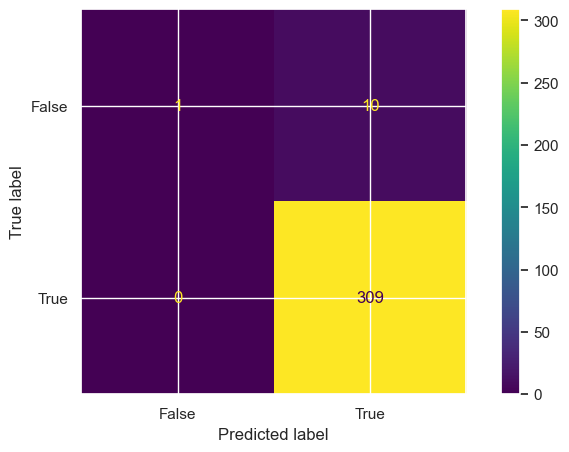

In [52]:
from sklearn import metrics

cm = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()
    

# Applying Machine Learning Models to develop predictive models 

## Naives Bayes Classifier, Logistic Regression & Random Forest Classifier

Model: Naive Bayes
Accuracy: 0.965625
Confusion Matrix:
[[  0  11]
 [  0 309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.97      1.00      0.98       309

    accuracy                           0.97       320
   macro avg       0.48      0.50      0.49       320
weighted avg       0.93      0.97      0.95       320



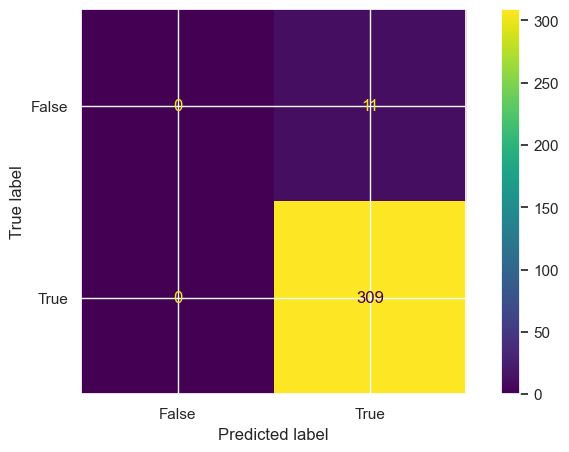

Model: Logistic Regression
Accuracy: 0.965625
Confusion Matrix:
[[  0  11]
 [  0 309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.97      1.00      0.98       309

    accuracy                           0.97       320
   macro avg       0.48      0.50      0.49       320
weighted avg       0.93      0.97      0.95       320



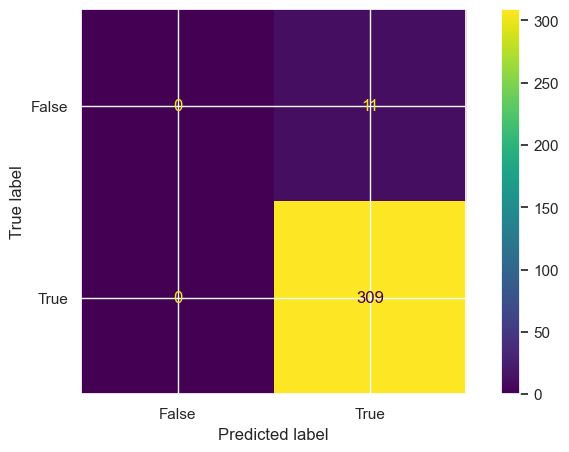

Model: Random Forest
Accuracy: 0.96875
Confusion Matrix:
[[  1  10]
 [  0 309]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.97      1.00      0.98       309

    accuracy                           0.97       320
   macro avg       0.98      0.55      0.58       320
weighted avg       0.97      0.97      0.96       320



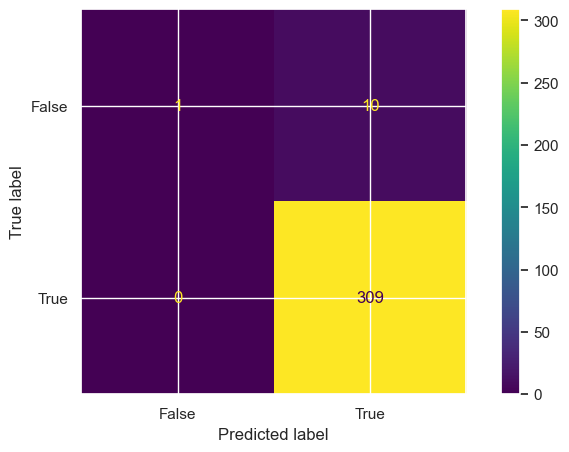

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import metrics

# Convert ratings to binary labels (positive/negative sentiment)
threshold = 3  # Choose an appropriate threshold
data['sentiment'] = data['reviews.rating'].apply(lambda x: 1 if x >= threshold else 0)

# Tokenize and preprocess the review text
X = data['reviews.text']
y = data['sentiment']
y=y.astype('int')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}
accuracy = {}
conf_matrix = {}
class_report = {}
# Train and evaluate each model
for model_name, model in models.items():
    #Create a pipeline with TF-IDF vectorization and the current model
    pipeline = make_pipeline(TfidfVectorizer(), model)
    
    # Train the model
    pipeline.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    # Evaluate the model
    accuracy[model_name] = accuracy_score(y_test, y_pred)
    conf_matrix[model_name] = confusion_matrix(y_test, y_pred)
    class_report[model_name] = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy[model_name]}")
    print(f"Confusion Matrix:\n{conf_matrix[model_name]}")
    print(f"Classification Report:\n{class_report[model_name]}")
    cm = confusion_matrix(y_test,y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    print("="*50)
